<a href="https://colab.research.google.com/github/Monishalakshmipathy/VISUAL_RECOMMENDER_IMAGES/blob/main/images_visualrecommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv("fashion.csv")

In [ ]:
dataset.head(20)

,ProductId,Gender,Category,SubCategory,ProductType,Colour,Usage,ProductTitle,Image,ImageURL
0,42419,Girls,Apparel,Topwear,Tops,White,Casual,Gini and Jony Girls Knit White Top,42419.jpg,http://assets.myntassets.com/v1/images/style/p...
1,34009,Girls,Apparel,Topwear,Tops,Black,Casual,Gini and Jony Girls Black Top,34009.jpg,http://assets.myntassets.com/v1/images/style/p...
2,40143,Girls,Apparel,Topwear,Tops,Blue,Casual,Gini and Jony Girls Pretty Blossom Blue Top,40143.jpg,http://assets.myntassets.com/v1/images/style/p...
3,23623,Girls,Apparel,Topwear,Tops,Pink,Casual,Doodle Kids Girls Pink I love Shopping Top,23623.jpg,http://assets.myntassets.com/v1/images/style/p...
4,47154,Girls,Apparel,Bottomwear,Capris,Black,Casual,Gini and Jony Girls Black Capris,47154.jpg,http://assets.myntassets.com/v1/images/style/p...
5,25520,Girls,Apparel,Topwear,Tops,White,Casual,Doodle Kids Girls City Chic White Top,25520.jpg,http://assets.myntassets.com/v1/images/style/p...
6,31120,Girls,Apparel,Topwear,Tops,Pink,Casual,Palm Tree Girls Pink Top,31120.jpg,http://assets.myntassets.com/v1/images/style/p...
7,31118,Girls,Apparel,Topwear,Tops,Red,Casual,Gini and Jony Girls Red Top,31118.jpg,http://assets.myntassets.com/v1/images/style/p...
8,54923,Girls,Apparel,Bottomwear,Capris,Olive,Casual,Do u speak Green Girls Olive 3/4 Pant,54923.jpg,http://assets.myntassets.com/v1/images/style/p...
9,31127,Girls,Apparel,Dress,Dresses,Black,Casual,Gini and Jony Girls Black Dress,31127.jpg,http://assets.myntassets.com/v1/images/style/p...


In [ ]:
import cv2
from skimage.io import imread
import tensorflow as tf
from keras.applications.resnet import ResNet50, preprocess_input
from keras.layers import GlobalMaxPooling2D
from numpy.linalg import norm
import pickle
from sklearn.neighbors import NearestNeighbors

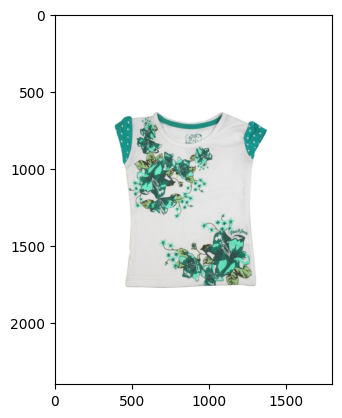

In [ ]:
a = imread(dataset['ImageURL'][0])
plt.imshow(a)

In [ ]:
model = ResNet50(weights = 'imagenet', input_shape = (224,224, 3), include_top = False)
model.trainable = False
model = tf.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])
model.save('model_file.h5')
model.summary()

94765736/94765736 [==============================] - 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d (Glob  (None, 2048)              0         
 alMaxPooling2D)                                                 
                                                                 
Total params: 23587712 (89.98 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
def extract_features_from_img(img_path, model) :
    print(type(img_path))
    img = imread(img_path)
    img = cv2.resize(img, (224,224))
    img = np.array(img)
    img_expanded = np.expand_dims(img, axis = 0)
    preprocessed = preprocess_input(img_expanded)
    result = model.predict(preprocessed).flatten()
    normalised = result / norm(result)
    return normalised

In [ ]:
filenames = dataset['ImageURL'].to_list()

In [ ]:
import tqdm
features = []
for file in filenames:
    features.append(extract_features_from_img(file, model))
print(len(features))

<class 'str'>
1/1 [==============================] - 2s 2s/step
<class 'str'>
1/1 [==============================] - 0s 235ms/step
<class 'str'>
1/1 [==============================] - 0s 324ms/step
<class 'str'>
1/1 [==============================] - 0s 198ms/step
<class 'str'>
1/1 [==============================] - 0s 192ms/step
<class 'str'>
1/1 [==============================] - 0s 189ms/step
<class 'str'>
1/1 [==============================] - 0s 195ms/step
<class 'str'>
1/1 [==============================] - 0s 223ms/step
<class 'str'>
1/1 [==============================] - 0s 230ms/step
<class 'str'>
1/1 [==============================] - 0s 227ms/step
<class 'str'>
1/1 [==============================] - 0s 323ms/step
<class 'str'>
1/1 [==============================] - 0s 280ms/step
<class 'str'>
1/1 [==============================] - 0s 200ms/step
<class 'str'>
1/1 [==============================] - 0s 213ms/step
<class 'str'>
1/1 [==============================] - 0s 195ms/ste

KeyboardInterrupt: 

In [ ]:
ss = pickle.dumps(features)
with open('file.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(features, file)

In [ ]:
with open('file.pkl', 'rb') as file :
    features = pickle.load(file)

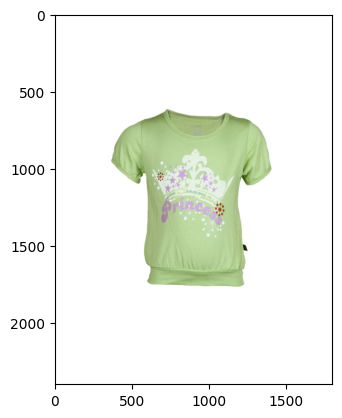

In [ ]:
a = imread(filenames[25])
plt.imshow(a)

In [ ]:
from sklearn.neighbors import NearestNeighbors
neighbours = NearestNeighbors(n_neighbors = 5, algorithm = 'brute', metric = 'euclidean')
neighbours.fit(features)
distance, indices = neighbours.kneighbors([extract_features_from_img(filenames[3], model)])

<class 'str'>
1/1 [==============================] - 0s 268ms/step


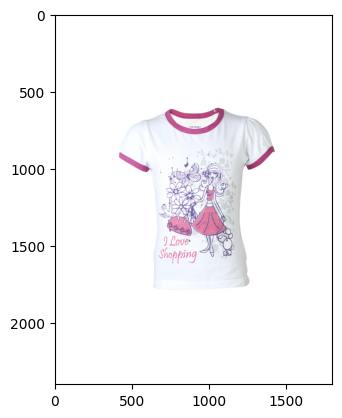

In [ ]:
img1 = imread(filenames[indices[0][1]])
plt.imshow(img1)

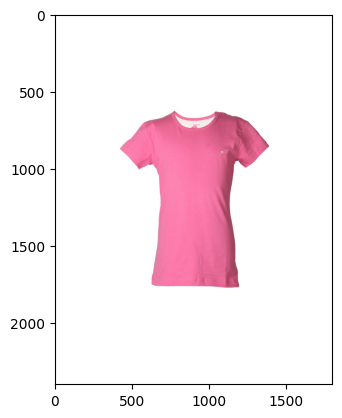

In [ ]:
img2 = imread(filenames[indices[0][2]])
plt.imshow(img2)

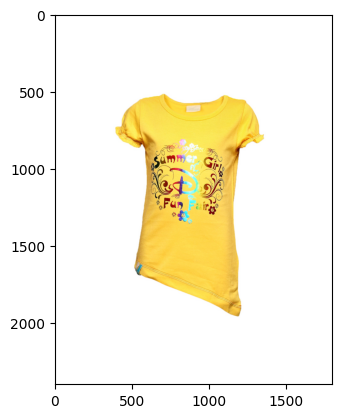

In [ ]:
img3 = imread(filenames[indices[0][4]])
plt.imshow(img3)

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

In [ ]:
(x_train, y_train), (x_test, y_test) =cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [ ]:
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

In [ ]:
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',
                       tf.keras.metrics.Precision(),
                       tf.keras.metrics.Recall(),
                       'mse'])

In [ ]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))


Epoch 1/5


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (32, 10) and (32, 6, 6, 64) are incompatible


In [ ]:
test_loss, test_acc, test_precision, test_recall, test_mse = model.evaluate(x_test, y_test)
test_rmse = tf.math.sqrt(test_mse)

print(f'Test accuracy: {test_acc}')
print(f'Test precision: {test_precision}')
print(f'Test recall: {test_recall}')
print(f'Test Mean Squared Error: {test_mse}')
print(f'Test Root Mean Squared Error: {test_rmse}')

313/313 [==============================] - 3s 11ms/step - loss: 0.9935 - accuracy: 0.6483 - precision: 0.7437 - recall: 0.5566 - mse: 0.0470
Test accuracy: 0.6482999920845032
Test precision: 0.7437199354171753
Test recall: 0.5565999746322632
Test Mean Squared Error: 0.04700702056288719
Test Root Mean Squared Error: 0.21681103110313416


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
epochs = range(len(acc))

In [ ]:
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

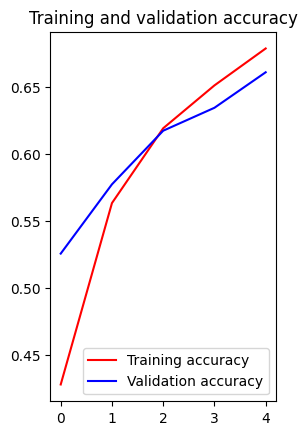

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

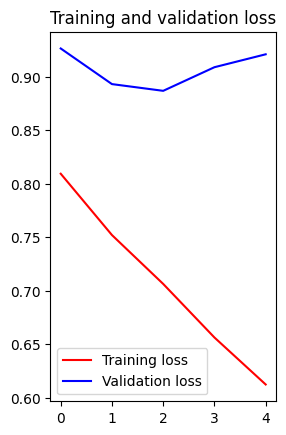

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from sklearn.metrics import precision_score, recall_score, mean_squared_error
import numpy as np

In [ ]:
max_features = 10000
max_len = 500

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)


17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
157/157 [==============================] - 22s 136ms/step - loss: 0.6143 - accuracy: 0.6481 - val_loss: 0.4403 - val_accuracy: 0.8086
Epoch 2/5
157/157 [==============================] - 22s 141ms/step - loss: 0.3950 - accuracy: 0.8296 - val_loss: 0.3600 - val_accuracy: 0.8490
Epoch 3/5
157/157 [==============================] - 22s 141ms/step - loss: 0.3090 - accuracy: 0.8776 - val_loss: 0.4026 - val_accuracy: 0.8480
Epoch 4/5
157/157 [==============================] - 22s 139ms/step - loss: 0.2456 - accuracy: 0.9060 - val_loss: 0.3973 - val_accuracy: 0.8454
Epoch 5/5
157/157 [==============================] - 22s 143ms/step - loss: 0.1807 - accuracy: 0.9348 - val_loss: 0.5434 - val_accuracy: 0.7616


In [ ]:
y_pred_prob = model.predict(x_test)
y_pred = np.round(y_pred_prob)

782/782 [==============================] - 19s 24ms/step


In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [ ]:
print(f'Test accuracy: {history.history["val_accuracy"][-1]}')
print(f'Test precision: {precision}')
print(f'Test recall: {recall}')
print(f'Test Mean Squared Error: {mse}')
print(f'Test Root Mean Squared Error: {rmse}')

Test accuracy: 0.7616000175476074
Test precision: 0.8970111631256752
Test recall: 0.59784
Test Mean Squared Error: 0.2354
Test Root Mean Squared Error: 0.48518037882832815


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
epochs = range(len(acc))

In [ ]:
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

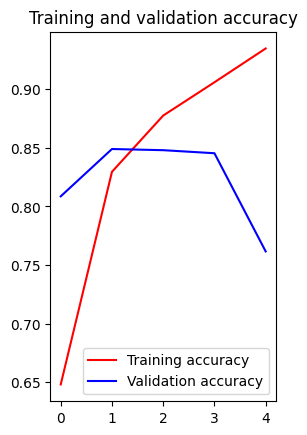

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

ValueError: x and y must have same first dimension, but have shapes (5,) and (1,)

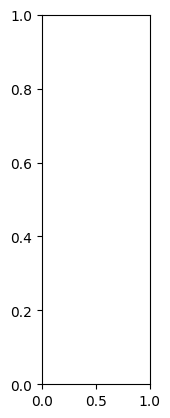

In [ ]:
plt.subplot(1, 4, 2)
plt.plot(epochs, precision, 'r', label='Precision')
plt.plot(epochs, recall, 'b', label='Recall')
plt.title('Precision and Recall')
plt.legend()

782/782 [==============================] - 22s 28ms/step


Text(0, 0.5, 'Classes')

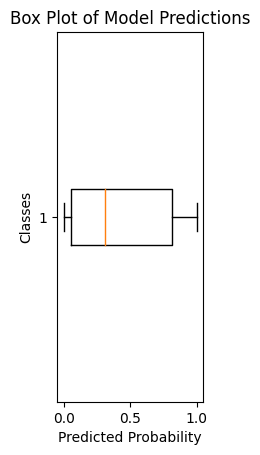

In [ ]:
plt.subplot(1, 3, 3)
predictions = model.predict(x_test)
plt.boxplot(predictions, vert=False)
plt.title('Box Plot of Model Predictions')
plt.xlabel('Predicted Probability')
plt.ylabel('Classes')

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

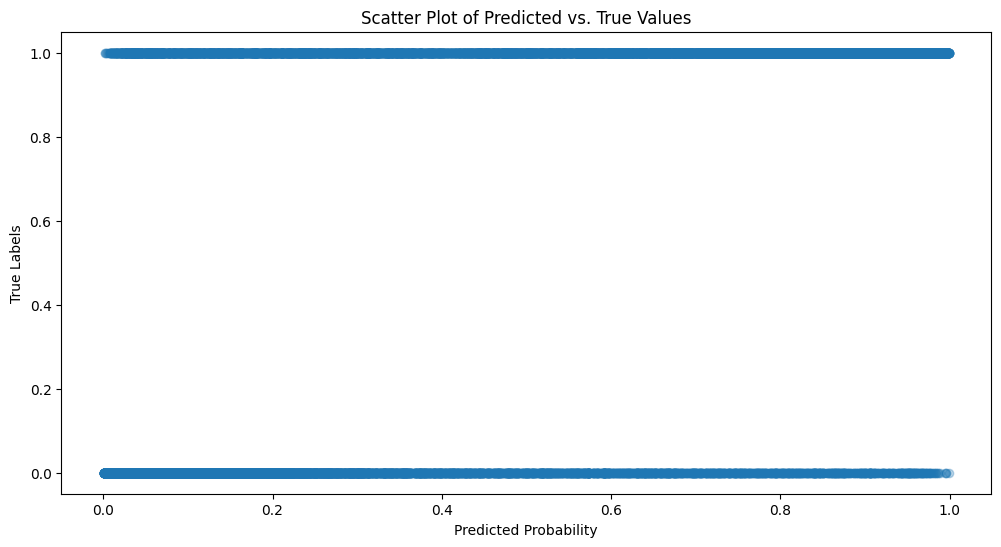

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(predictions, y_test, alpha=0.3)
plt.title('Scatter Plot of Predicted vs. True Values')
plt.xlabel('Predicted Probability')
plt.ylabel('True Labels')
plt.show()

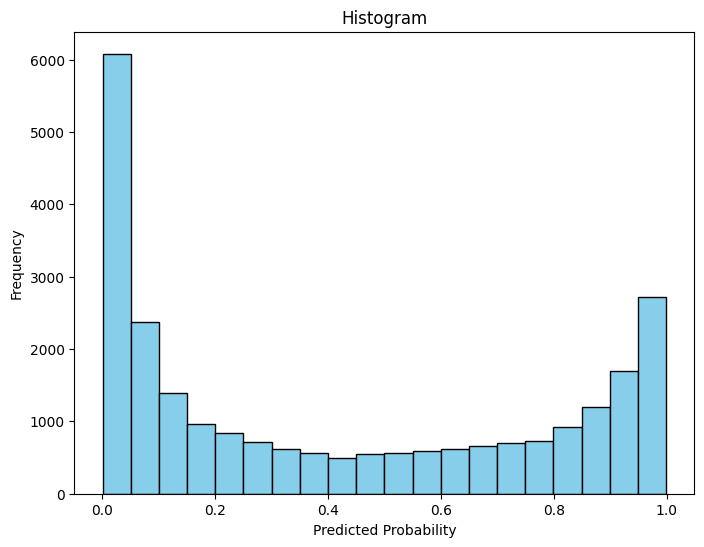

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(predictions, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()